In [24]:
# making 5 or not classifier
from sklearn.datasets import fetch_openml
import pandas as pd
import numpy as np
mnist=fetch_openml('mnist_784',version=1)
mnist.keys()


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [5]:
x,y=mnist['data'],mnist['target']

In [21]:
x.shape
print(type(x))
print(x.iloc[0].shape if hasattr(x, 'iloc') else "iloc not available")

<class 'pandas.core.frame.DataFrame'>
(784,)


(-0.5, 27.5, 27.5, -0.5)

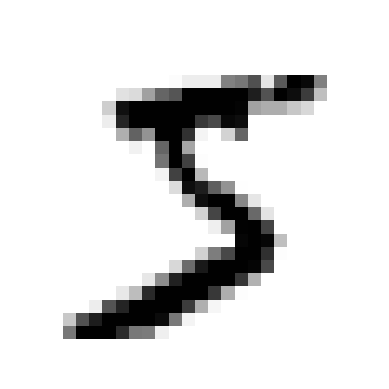

In [26]:
import matplotlib as mpl
import matplotlib.pyplot as plt
some_digit = x.iloc[0]
some_digit_image = some_digit.to_numpy().reshape(28, 28)

plt.imshow(some_digit_image, cmap=mpl.cm.binary, interpolation="nearest")
plt.axis("off")
# plt.show()

In [27]:
# converting into integer

In [28]:
y=y.astype(np.uint8)

In [31]:
x_train,x_test,y_train, y_test=x[:60000],x[60000:],y[:60000],y[60000:]

In [32]:
y_train_5=(y_train==5)

In [33]:
y_test_5=(y_test==5)

In [35]:
from sklearn.linear_model import SGDClassifier


In [36]:
sgd_clf=SGDClassifier(random_state=42)

In [37]:
sgd_clf.fit(x_train,y_train_5)

SGDClassifier(random_state=42)

In [38]:
sgd_clf.predict([some_digit])

C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

In [40]:
 from sklearn.model_selection import cross_val_predict
y_train_predict=cross_val_predict(sgd_clf,x_train,y_train_5,cv=3)

In [41]:
from sklearn.metrics import confusion_matrix 
confusion_matrix(y_train_5,y_train_predict)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [45]:
# sklearn provides the standard function to  calculate precision and recall
from sklearn.metrics import precision_score , recall_score
precision_score(y_train_5,y_train_predict)

0.8370879772350012

In [44]:
recall_score(y_train_5,y_train_predict
            
            )

0.6511713705958311

In [46]:
 from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_predict)

0.7325171197343847